In [193]:
import numpy as np

In [194]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [195]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [196]:
from pylab import plot, show, subplot, specgram, imshow, savefig

In [197]:
from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.cross_validation import cross_val_score

In [198]:
%matplotlib inline

In [319]:
data_train = pd.read_csv("train_data.csv")

In [320]:
data_test = pd.read_csv("test_data.csv")

In [321]:
data_train.shape

(100, 13)

In [322]:
data_test.shape

(514, 12)

In [325]:
data_train.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,1003,M,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,1005,M,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,1006,M,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,1008,M,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [204]:
data_train.describe()

,Application_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100.000000,100.00000,100.000000,95.000000,95.000000,92.000000
mean,1160.470000,4122.83000,1700.550000,134.221053,341.684211,0.836957
std,104.622212,2258.89434,1947.668891,63.456163,61.309342,0.371429
min,1002.000000,1000.00000,0.000000,17.000000,60.000000,0.000000
25%,1062.500000,2636.00000,0.000000,99.500000,360.000000,1.000000
50%,1153.000000,3598.00000,1558.500000,120.000000,360.000000,1.000000
75%,1253.500000,4710.00000,2394.500000,154.500000,360.000000,1.000000
max,1343.000000,12841.00000,10968.000000,349.000000,480.000000,1.000000


In [205]:
data_train.isnull().sum()

Application_ID       0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64

In [206]:
data_test.isnull().sum()

Application_ID        0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term      9
Credit_History       42
Property_Area         0
dtype: int64

In [207]:
train = pd.read_csv("train_data.csv")

In [208]:
test = pd.read_csv("test_data.csv")

In [209]:
targets = train.Loan_Status

In [210]:
train.drop('Loan_Status', 1, inplace=True)

In [211]:
combined = train.append(test)

In [212]:
combined.reset_index(inplace=True)

In [213]:
combined.drop(['index','Application_ID'], inplace=True, axis =1)

In [214]:
combined.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,M,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,M,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,M,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [215]:
combined.shape

(614, 11)

In [216]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [217]:
def show_missing():
    missing = combined.columns[combined.isnull().any()].tolist()
    return missing

In [218]:
combined[show_missing()].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [219]:
print(combined['Property_Area'].value_counts())
print(combined['Education'].value_counts())
print(combined['Gender'].value_counts())
print(combined['Dependents'].value_counts())
print(combined['Married'].value_counts())
print(combined['Self_Employed'].value_counts())
print(combined['Credit_History'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
M    489
F    112
Name: Gender, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [220]:
combined['Gender'].fillna('Male', inplace=True)

In [221]:
combined['Married'].fillna('Yes', inplace =True)

In [222]:
combined['Self_Employed'].fillna('Yes', inplace=True)

In [223]:
combined['Credit_History'].fillna(1, inplace=True)

In [224]:
combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)

In [225]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

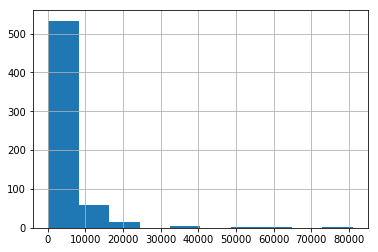

In [226]:
combined['ApplicantIncome'].hist()

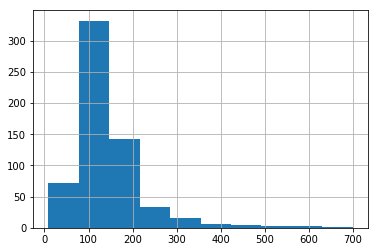

In [227]:
combined['LoanAmount'].hist()

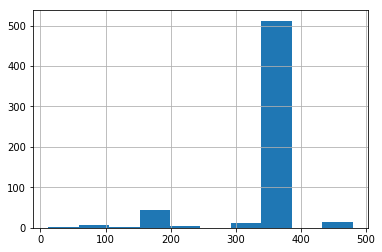

In [228]:
combined['Loan_Amount_Term'].hist()

In [229]:
combined['Gender'].replace('Male','M', inplace=True)

In [230]:
combined

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,M,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,M,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,M,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,M,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,M,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,M,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,M,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,M,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


Text(0,0.5,'mean ApplicantIncome')

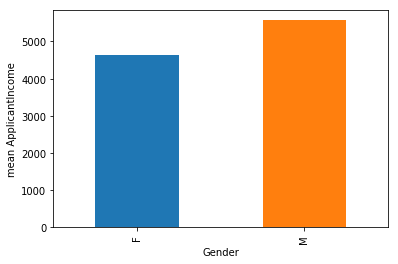

In [231]:
ax = combined.groupby('Gender').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Gender")
ax.set_ylabel("mean ApplicantIncome")

Text(0,0.5,'mean ApplicantIncome')

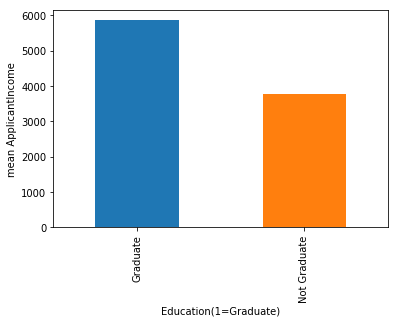

In [232]:
ax = combined.groupby('Education').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Education(1=Graduate)")
ax.set_ylabel("mean ApplicantIncome")

Text(0,0.5,'mean ApplicantIncome')

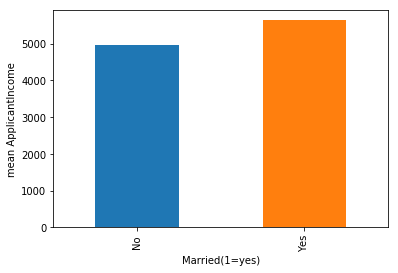

In [233]:
ax = combined.groupby('Married').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Married(1=yes)")
ax.set_ylabel("mean ApplicantIncome")

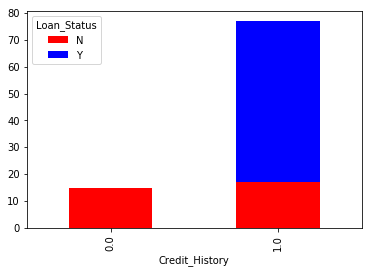

In [234]:
temp = pd.crosstab(data_train['Credit_History'], data_train['Loan_Status'])
temp.plot(kind='bar', stacked=  True, color=['red','blue'], grid=False)

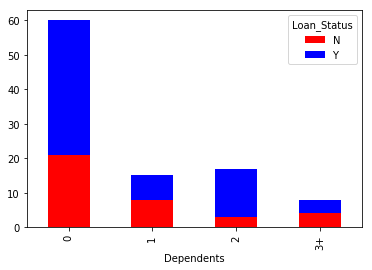

In [235]:
temp2 = pd.crosstab(data_train['Dependents'], data_train['Loan_Status'])
temp2.plot(kind='bar', stacked=True, color = ['red','blue'], grid=False)

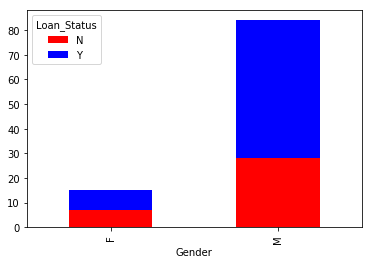

In [236]:
temp3 = pd.crosstab(data_train['Gender'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked= True, color= ['red','blue'], grid = False)

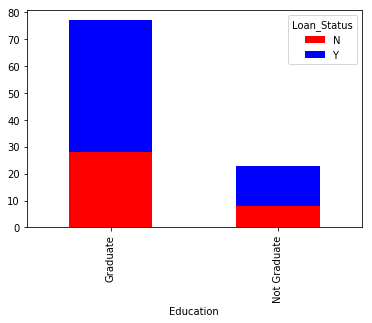

In [237]:
temp4 = pd.crosstab(data_train['Education'], data_train['Loan_Status'])
temp4.plot(kind='bar', stacked= True, color=['red','blue'], grid=False)

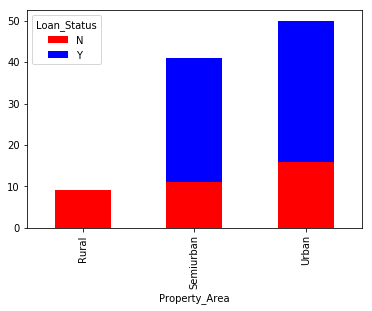

In [238]:
temp5 = pd.crosstab(data_train['Property_Area'], data_train['Loan_Status'])
temp5.plot(kind='bar',stacked= True, color=['red','blue'], grid= False)

# Feature Engineering

## One Hot Encoding

In [239]:
combined['Gender'] = combined['Gender'].map({'M':1, 'F':0 })
combined['Married'] = combined['Married'].map({'Yes':1, 'No':0 })
combined['Education'] = combined['Education'].map({'Graduate':1, 'Not Graduate':0})
combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1, 'No':0})

In [240]:
combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
combined.drop(['Dependents'], axis =1, inplace = True)

In [241]:
combined['Total_income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [242]:
combined['Income_Ratio'] = combined['Total_income'] / combined['LoanAmount']

In [243]:
combined['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [244]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term, unapproved_term])
df.index = ['Approved', 'Unapproved']

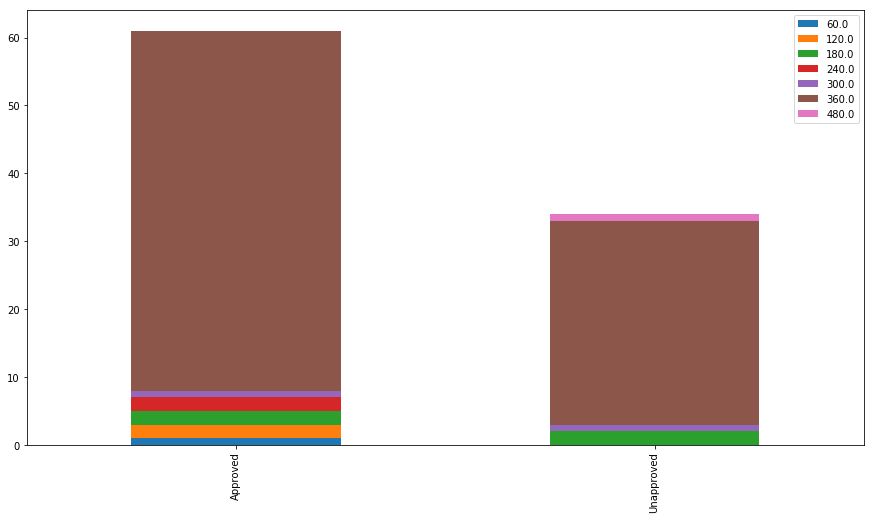

In [245]:
df.plot(kind='bar', stacked= True, figsize= (15,8))

In [246]:
combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300 else 0)
combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
combined.drop('Loan_Amount_Term', axis=1, inplace = True)

In [247]:
combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1  if c==2 else 0)
combined.drop('Credit_History', axis= 1, inplace = True)

In [248]:
property_dummies = pd.get_dummies(combined['Property_Area'],prefix ='Property')
combined = pd.concat([combined, property_dummies], axis=1)
combined.drop('Property_Area', axis=1, inplace = True)

In [249]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_income,Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
60,1,1,1,0,120.0,0,0,0,6296.0,52.466667,0,0,0,1,0,1,0,0,0,1
61,1,1,1,0,99.0,0,0,1,3029.0,30.595960,0,0,0,1,0,1,0,0,0,1
62,1,1,0,1,165.0,0,0,0,6058.0,36.715152,0,0,1,0,1,0,0,1,0,0
63,1,1,1,0,128.0,1,0,0,4945.0,38.632812,0,0,0,1,1,0,0,1,0,0
64,0,0,1,0,116.0,0,0,0,4166.0,35.913793,0,0,0,1,1,0,0,0,1,0
65,1,1,1,0,258.0,0,0,0,10321.0,40.003876,0,0,0,1,0,1,0,0,1,0
66,1,0,0,0,126.0,0,0,0,5454.0,43.285714,0,0,1,0,1,0,0,0,0,1
67,1,1,1,0,312.0,1,0,0,10750.0,34.455128,0,0,0,1,0,1,0,0,0,1
68,1,1,0,1,125.0,0,0,1,7100.0,56.800000,1,0,0,0,0,1,0,0,0,1
69,0,0,1,0,136.0,0,0,0,4300.0,31.617647,0,0,0,1,1,0,0,0,1,0


In [250]:
def feature_scaling(dataframe):
    dataframe -= dataframe.min()
    dataframe /= dataframe.max()
    return dataframe

In [251]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_income'] = feature_scaling(combined['Total_income'])
combined['Income_Ratio'] = feature_scaling(combined['Income_Ratio'])

In [252]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_income,Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,0.172214,0,0,0,0.055394,0.087450,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,0.172214,1,0,0,0.058435,0.092370,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,0.082489,0,0,0,0.019583,0.086824,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,0.160637,0,0,0,0.043980,0.075687,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,0.191027,0,0,0,0.057292,0.079274,0,0,0,1,0,1,0,0,0,1


In [258]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [259]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [270]:
global combined, data_train
targets = data_train['Loan_Status'].map({'Y':1,'N':0})
train = combined.head(100)
test = combined.iloc[100:]

In [271]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [272]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

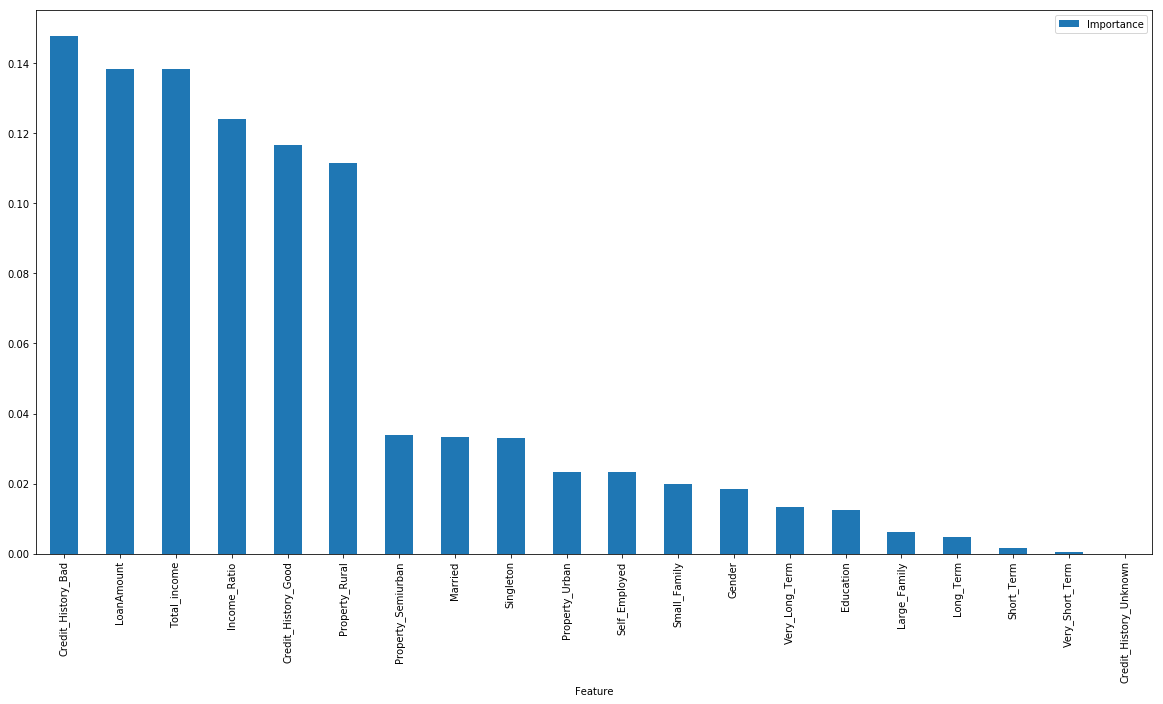

In [273]:
features.plot(kind='bar', figsize=(20,10))

In [274]:
model = SelectFromModel(clf, prefit =True)
train_reduced = model.transform(train)
train_reduced.shape

(100, 6)

In [277]:
test_reduced =model.transform(test)
test_reduced.shape

(514, 6)

In [278]:
parameters = {'bootstrap':False,
                         'min_samples_leaf':3,
                         'n_estimators':50,
                         'min_samples_split':10,
                         'max_features':'sqrt',
                         'max_depth':6}

In [279]:
model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [280]:
compute_score(model, train, targets, scoring= 'accuracy')

0.8273182957393483

In [281]:
output = model.predict(test).astype(int)

In [282]:
df_output = pd.DataFrame()

In [284]:
aux = pd.read_csv('test_data.csv')

In [285]:
df_output['Application_ID'] = aux['Application_ID']

In [286]:
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)

In [287]:
df_output[['Application_ID','Loan_Status']].to_csv('output1.csv', index=False)

# Other Algorithms

In [294]:
### Prediction Model
# Train_Test_Split
from sklearn.model_selection import train_test_split
datatrain, dataset, labeltrain, labeltest = train_test_split(train, targets, test_size = 0.2, random_state = 42)
labeltrain.shape

(80,)

In [295]:
# Logistics Regression
from sklearn.linear_model  import LogisticRegression
logis = LogisticRegression()

In [296]:
logis.fit(datatrain, labeltrain)
logis_score_train = logis.score(datatrain, labeltrain)

In [297]:
print("Training_score :", logis_score_train)

Training_score : 0.8875


In [298]:
logis_score_test = logis.score(dataset, labeltest)

In [299]:
print(" Test Score :", logis_score_test)

 Test Score : 0.65


In [300]:
# saving output of decision tree
output2 = logis.predict(test).astype(int)
df_output2 = pd.DataFrame()

In [301]:
aux = pd.read_csv('test_data.csv')

In [302]:
df_output2['Application_ID'] = aux['Application_ID']
df_output2['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output2)
df_output2[['Application_ID', 'Loan_Status']].to_csv('output2.csv', index= False)

In [303]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier

In [304]:
dt = RandomForestClassifier()

In [305]:
dt.fit(datatrain, labeltrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [307]:
dt_score_train = dt.score(datatrain, labeltrain)

In [308]:
print("Training Score: ", dt_score_train)

Training Score:  0.9875


In [309]:
dt_score_test = dt.score(dataset, labeltest)

In [310]:
print("Testing Score :", dt_score_test)

Testing Score : 0.65


In [315]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(datatrain, labeltrain)
rfc_score_train = rfc.score(datatrain, labeltrain)
print("Training score :", rfc_score_train)
rfc_score_test = rfc.score(dataset, labeltest)
print(" Test score :", rfc_score_test)

Training score : 1.0
 Test score : 0.75


In [316]:
# Model Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression ', 'Decision Tree', 'Random Forest'],
    'Training_score' : [logis_score_train, dt_score_train, rfc_score_train],
    'Testing_score' : [logis_score_test, dt_score_test, rfc_score_test]
})
models.sort_values(by = 'Testing_score', ascending=False)

,Model,Testing_score,Training_score
2,Random Forest,0.75,1.0000
0,Logistic Regression,0.65,0.8875
1,Decision Tree,0.65,0.9875
